In [1]:
import pandas as pd
from pydataset import data
import numpy as np
import datetime 
 

In [2]:
from env import host, user, password

In [3]:
mpg = data('mpg')

In [4]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
# On average, which manufacturer has the best miles per gallon?
mpg['average_mpg'] = mpg[['cty', 'hwy']].mean(axis= 1)
mpg.groupby('manufacturer').average_mpg.mean().idxmax()

'honda'

In [6]:
# How many different manufacturers are there?
len(mpg.groupby('manufacturer'))

15

In [7]:
# How many different models are there?
len(mpg.groupby('model'))

38

In [8]:
# Do automatic or manual cars have better miles per gallon?

auto_avg_mpg = mpg[mpg.trans.str.contains('auto')].average_mpg.mean()
auto_avg_mpg

19.130573248407643

In [9]:
manual_avg_mpg = mpg[mpg.trans.str.contains('manual')].average_mpg.mean()
manual_avg_mpg

22.227272727272727

In [10]:
print(f'Automatic average mpg = {auto_avg_mpg}. Manual averge mpg = {manual_avg_mpg}')

Automatic average mpg = 19.130573248407643. Manual averge mpg = 22.227272727272727


In [11]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [12]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [13]:
# Copy the users and roles dataframes from the examples above. What do you think a right join would look like?
# An outer join? What happens if you drop the foreign keys from the dataframes and try to merge them?

pd.merge(users, roles, left_on='role_id', right_on='id', how='right')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [14]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='outer')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [15]:
def get_db_url(database):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

In [16]:
employees = pd.read_sql("SELECT* from employees", get_db_url('employees'))

In [17]:
employees.describe()

,emp_no
count,300024.000000
mean,253321.763392
std,161828.235540
min,10001.000000
25%,85006.750000
50%,249987.500000
75%,424993.250000
max,499999.000000


In [18]:
titles = pd.read_sql("select * from titles", get_db_url('employees'))

In [19]:
# Visualize the number of employees with each title.
#Instructor's method
titles.title.value_counts().plot.barh()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

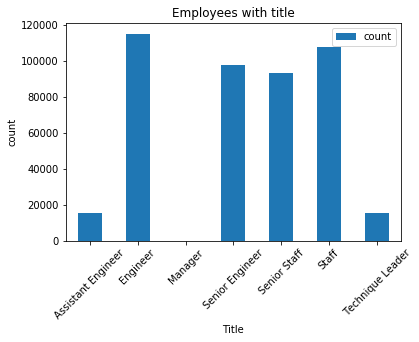

In [20]:
# Visualize the number of employees with each title.
title_employees = titles.groupby('title')

import matplotlib.pyplot as plt
title_employees.agg(['count']).emp_no.plot.bar()
plt.title('Employees with title')
plt.xlabel('Title')
plt.ylabel('count')
plt.xticks(rotation = 45)

In [21]:
# Join the employees and titles dataframes together.

merge_employees = pd.merge(employees, titles, left_on='emp_no', right_on='emp_no', how='left')
merge_employees

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


In [22]:
# Visualize how frequently employees change titles.
merged = merge_employees.groupby('emp_no').count()
merged = merged.reset_index()

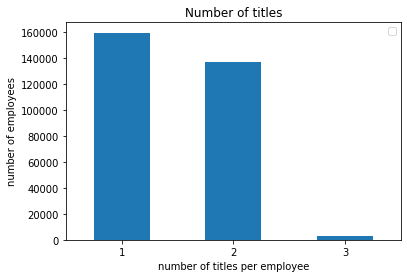

In [23]:
merged = merged[['emp_no', 'to_date']]
job_changes = merged.groupby('to_date').count()
job_changes.plot.bar()
plt.title('Number of titles')
plt.xlabel('number of titles per employee')
plt.ylabel('number of employees')
plt.xticks(rotation = 0)
plt.legend('')

In [38]:
#second methods of visualizing how frequenctly change jobs. First find out emp_no who held 2 or more titles
emp_title_2_3 = merge_employees.groupby('emp_no').birth_date.count()[merge_employees.groupby('emp_no').birth_date.count() > 1].reset_index().emp_no
emp_title_2_3.head(5)

0    10004
1    10005
2    10007
3    10009
4    10012
Name: emp_no, dtype: int64

In [26]:
#find out how many years each employee worked for a particular title
latest_date = datetime.date(2000,8,1)

merge_employees['days_in_job'] = np.where(merge_employees.to_date.astype('str') == '9999-01-01', ((latest_date-merge_employees.from_date)), (merge_employees.to_date - merge_employees.from_date).astype('timedelta64[D]')) 

days_in_job = merge_employees[['emp_no', "days_in_job"]]
days_in_job['years_in_job'] = days_in_job.days_in_job.astype('timedelta64[D]')/365
years_in_job_mean = days_in_job.groupby('emp_no').years_in_job.mean()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


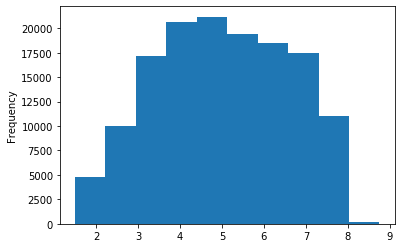

In [37]:
# merge years_in_job and emp_title_2_3 (employees with 2 or more jobs) to get a list of employees who held 2 or more jobs and corresponding mean
#numbers of year in each title. Then plot a histogram.
pd.merge(years_in_job_mean, emp_title_2_3, left_on='emp_no', right_on='emp_no', how='right').years_in_job.plot.hist()

In [56]:
# For each title, find the hire date of the employee that was hired most recently with that title.
merge_employees.groupby(['title']).hire_date.agg(max)

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

In [57]:
# Write the code necessary to create a cross tabulation of the number of titles by department.
# (Hint: this will involve a combination of SQL and python/pandas code)

dept_emp = pd.read_sql("select * from dept_emp", get_db_url('employees'))


In [58]:
#First select current employees only i.e. where to_date = 9999-01-01
dept_emp_current = dept_emp[dept_emp.to_date.astype('str') == '9999-01-01']
dept_emp_current

,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01
...,...,...,...,...
331598,499995,d004,1997-06-02,9999-01-01
331599,499996,d004,1996-05-13,9999-01-01
331600,499997,d005,1987-08-30,9999-01-01
331601,499998,d002,1993-12-27,9999-01-01


In [60]:
#Selecting current titles only i.e. where to_date = 9999-01-01
titles_current = titles[titles.to_date.astype('str') == '9999-01-01']
titles_current.head(4)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [61]:
titles_and_dept = pd.merge(titles, dept_emp, left_on='emp_no', right_on='emp_no', how='outer')

In [62]:
#used crosstab to obtain cross tablulation of dept and titles
pd.crosstab(titles_and_dept.title, titles_and_dept.dept_no)

dept_no,d001,d002,d003,d004,d005,d006,d007,d008,d009
title,,,,,,,,,
Assistant Engineer,0,0,0,6445,7769,1831,0,378,298
Engineer,0,0,0,49649,58135,13852,0,2986,2362
Manager,2,2,2,4,2,4,2,2,4
Senior Engineer,0,0,0,42205,49326,11864,0,2570,2027
Senior Staff,13940,12139,12274,1270,1247,0,36191,11637,13925
Staff,16196,13929,14342,1478,1424,0,41808,13495,16150
Technique Leader,0,0,0,6557,7683,1795,0,393,309


In [40]:
orders = pd.read_sql("SELECT* from orders", get_db_url('chipotle'))

In [41]:
orders.head(5)

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [42]:
orders['price'] = orders.item_price.str.replace("$", "").astype(float) 
orders


,id,order_id,quantity,item_name,choice_description,item_price,price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39,2.39
1,2,1,1,Izze,[Clementine],$3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98,16.98
...,...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75,11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75,11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25,11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75,8.75


In [43]:
# What is the total price for each order?
orders.groupby('order_id').price.sum()

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: price, Length: 1834, dtype: float64

In [66]:
# What are the most popular 3 items?
popular = orders.groupby('item_name').quantity.sum()


In [64]:
popular = popular.reset_index()
popular.head(5)

,item_name,quantity
0,6 Pack Soft Drink,55
1,Barbacoa Bowl,66
2,Barbacoa Burrito,91
3,Barbacoa Crispy Tacos,12
4,Barbacoa Salad Bowl,10


In [65]:
popular.sort_values(by= 'quantity', ascending = False).head(3)

,item_name,quantity
17,Chicken Bowl,761
18,Chicken Burrito,591
25,Chips and Guacamole,506


In [47]:
# Which item has produced the most revenue?
revenue = orders.groupby('item_name').price.sum()
revenue = revenue.reset_index()
revenue = revenue.rename(columns={'price': 'revenue'})

In [48]:
revenue.sort_values(by= 'revenue', ascending = False).head(1)

,item_name,revenue
17,Chicken Bowl,7342.73
